In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')

# Auto-Regression

## AR(1): 1 step ahead

In [3]:
m = NeuralProphet(
    n_forecasts=3,
    n_lags=5,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, freq="D")
metrics.head(3)

INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 17.58it/s, SmoothL1Loss=0.00519, MAE=0.339, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.280300,3.040234,0.0
1,0.037489,1.051541,0.0
2,0.016232,0.655731,0.0


INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.


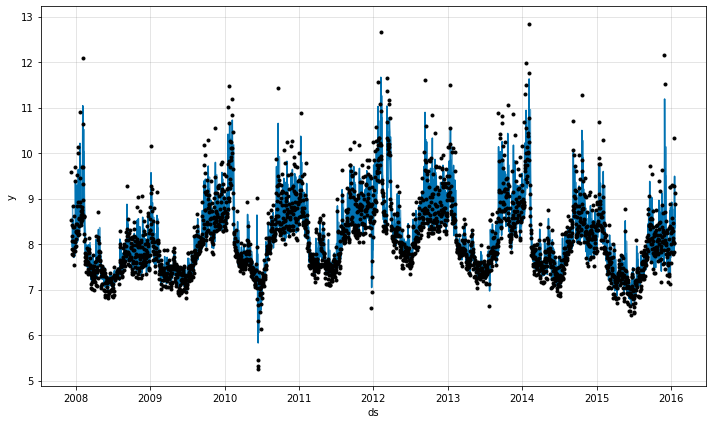

In [4]:
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

In [5]:
# fig_comp = m.plot_components(forecast)

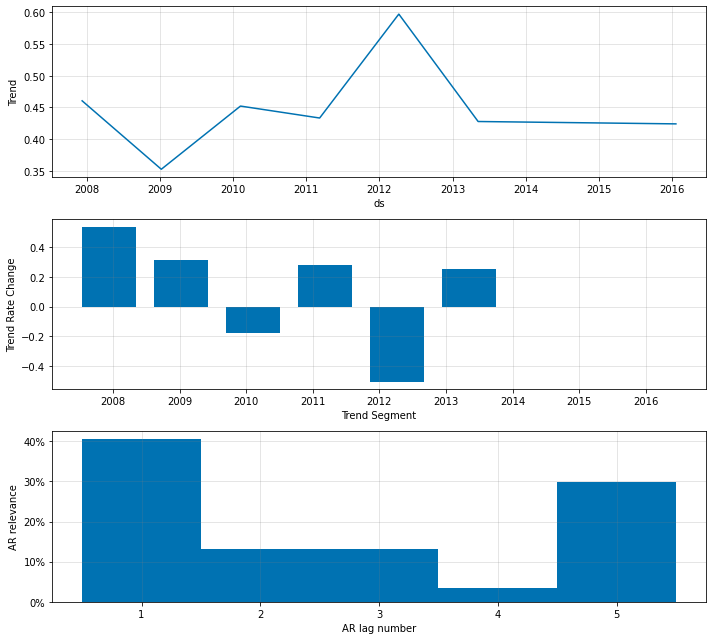

In [6]:
fig_param = m.plot_parameters()

### AR(60): 1 step ahead

In [7]:
m = NeuralProphet(
    n_forecasts=1,
    n_lags=60,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, freq="D")

INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 17.62it/s, SmoothL1Loss=0.00344, MAE=0.292, RegLoss=0]


INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.


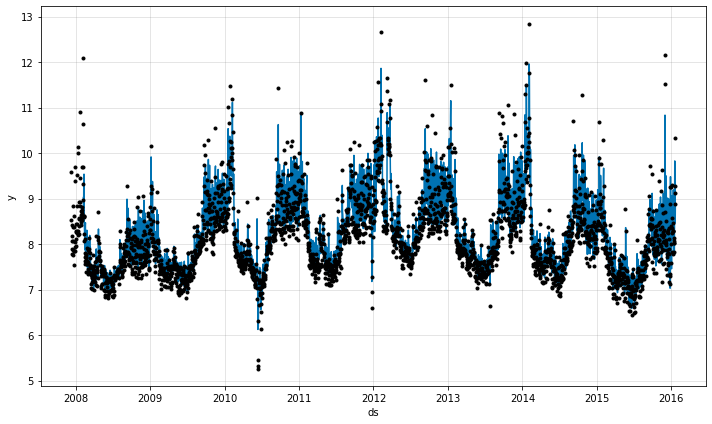

In [8]:
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

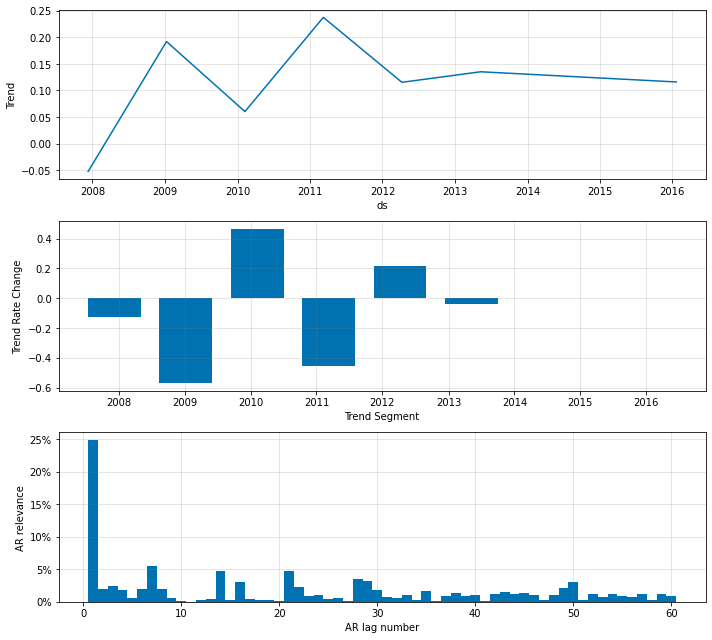

In [9]:
fig_param = m.plot_parameters()

### AR(60): 1-30 step ahead

In [10]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    learning_rate=3,
    epochs=100,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, freq="D")

INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:08<00:00, 12.04it/s, SmoothL1Loss=0.00516, MAE=0.349, RegLoss=0]


INFO: nprophet - _handle_missing_data: 59 missing dates were added.
INFO: nprophet - _handle_missing_data: 59 NaN values in column y were auto-imputed.


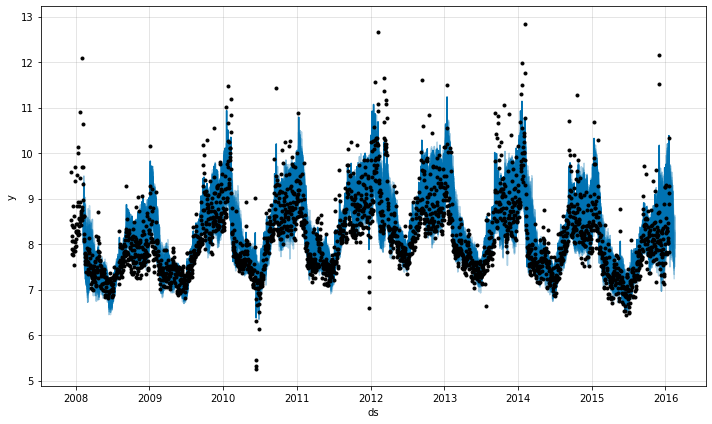

In [11]:
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

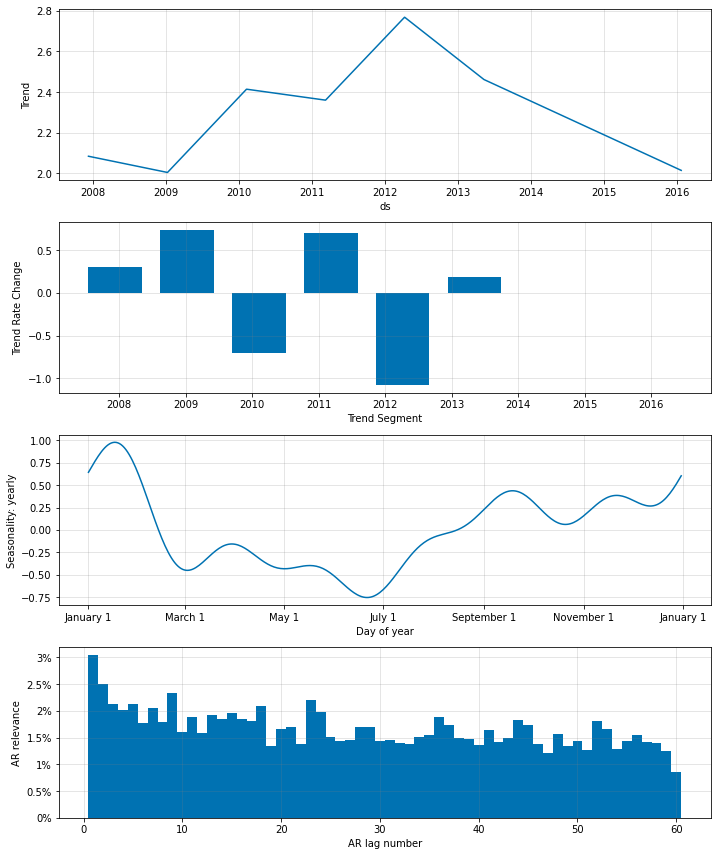

In [12]:
fig_param = m.plot_parameters()

INFO: nprophet - _handle_missing_data: 1 missing dates were added.
INFO: nprophet - _handle_missing_data: 1 NaN values in column y were auto-imputed.


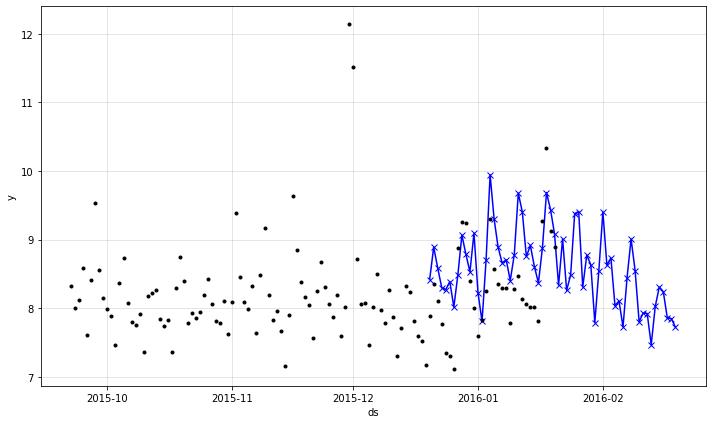

In [13]:
future = m.make_future_dataframe(df, n_historic_predictions=60)
forecast = m.predict(future)
fig_fit = m.highlight_nth_step_ahead_of_each_forecast(30).plot(forecast)

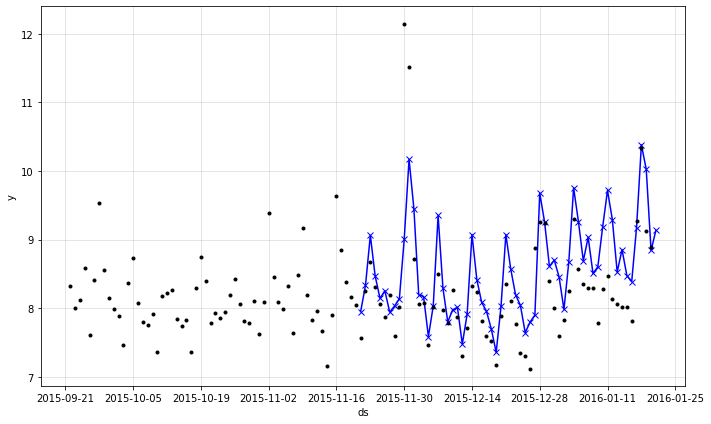

In [14]:
fig_fit = m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)

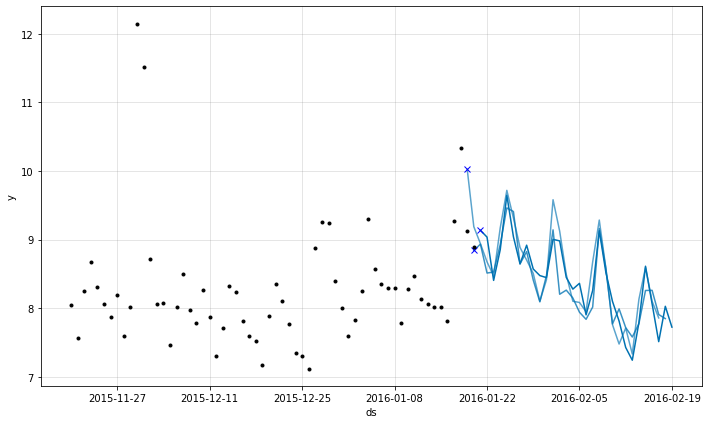

In [15]:
fig_prediction = m.plot_last_forecast(forecast, include_previous_forecasts=2)

### AR(60): 1-30 step ahead, Sparse weights

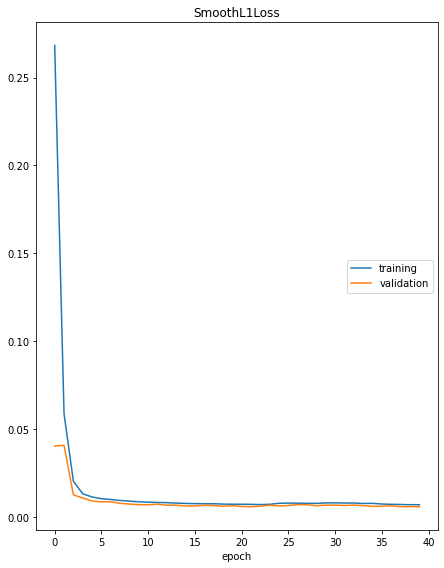

Epoch[40/40]: 100%|██████████| 40/40 [00:04<00:00,  8.09it/s, SmoothL1Loss=0.00713, MAE=0.43, RegLoss=0.00929, MAE_val=0.398, SmoothL1Loss_val=0.00598]


In [16]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    ar_sparsity=0.5,
    learning_rate=3,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, freq="D", plot_live_loss=True, validate_each_epoch=0.1)

In [17]:
future = m.make_future_dataframe(df, n_historic_predictions=30)
forecast = m.predict(future)

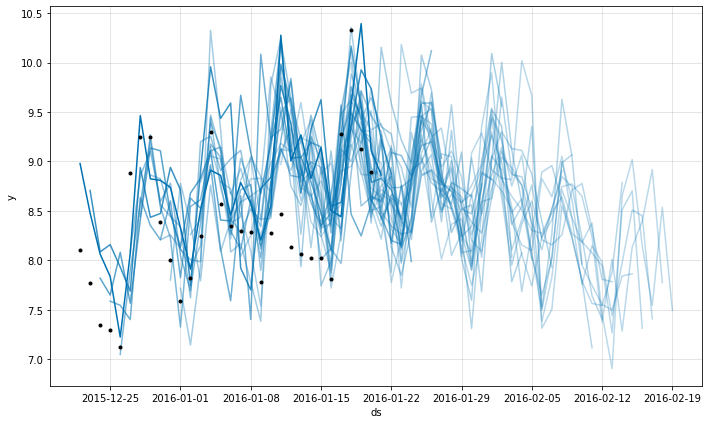

In [18]:
fig_fit = m.plot(forecast[60:])

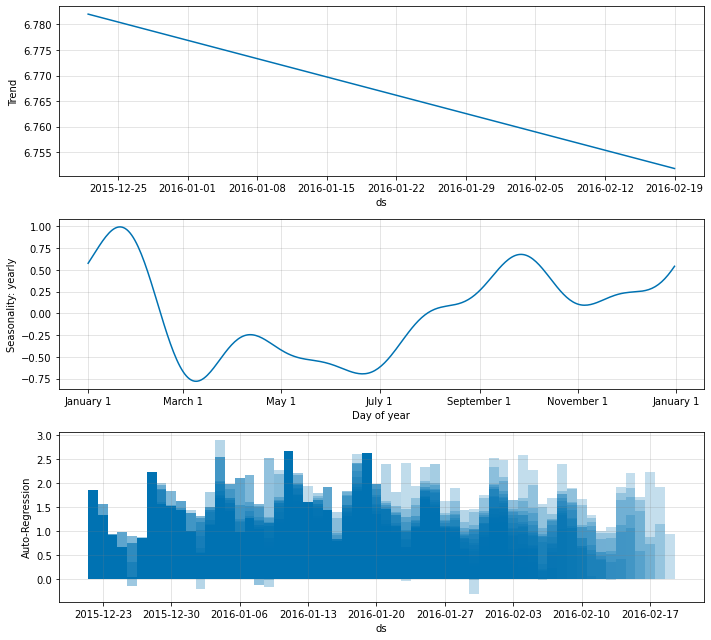

In [19]:
fig_comp = m.plot_components(forecast[60:])

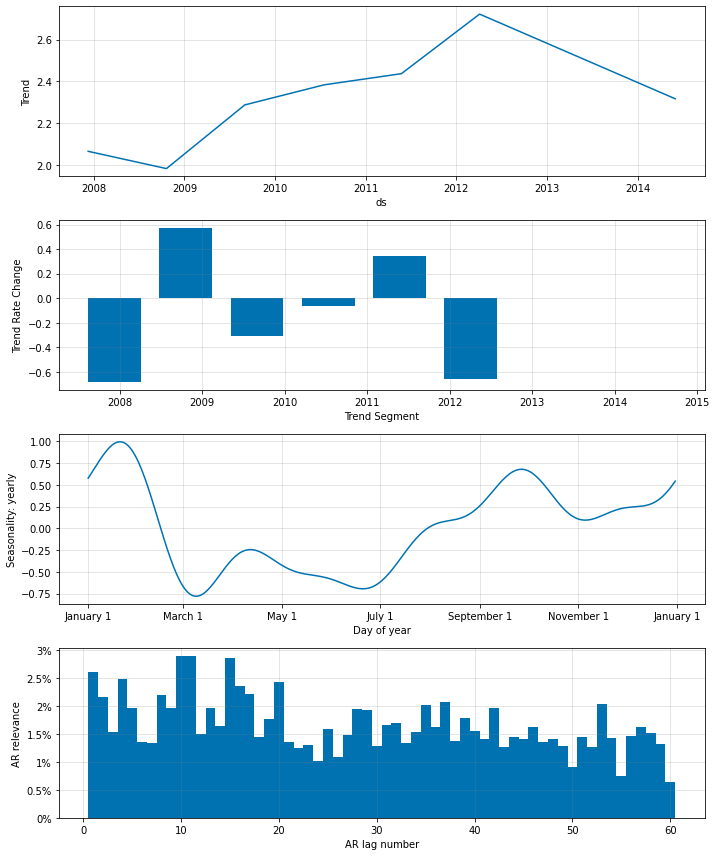

In [20]:
fig_param = m.plot_parameters()

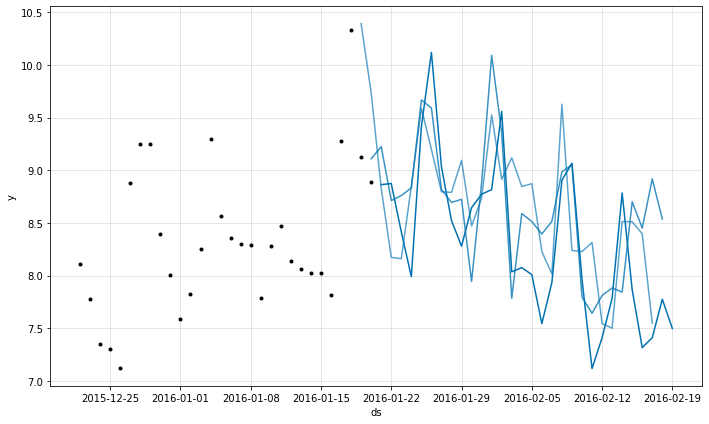

In [21]:
fig_prediction = m.plot_last_forecast(forecast[60:], include_previous_forecasts=2)

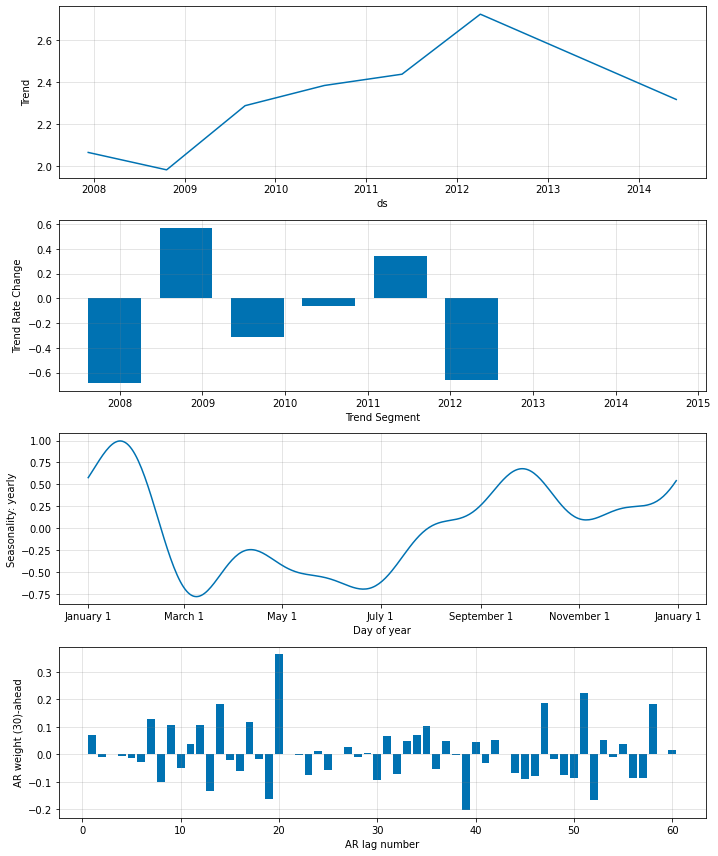

In [22]:
m.highlight_nth_step_ahead_of_each_forecast(30)
fig_param = m.plot_parameters()